# Project Part 4
# Team 4
# Garland Lau, Reed Bevins, Ryan Thomas
# Auction Verification

Data cleaning. Remove outliers with long runtimes.

In [52]:
import pandas as pd
import os


file_path = r'C:\Users\garla\first-node\ML\project\data.csv'
#os.chdir(r'C:\Users\garla\first-node\ML\project')

auction = pd.read_csv("data.csv")
# auction.info()

# True verification results
# reomve outliers with too long or short runtimes
auction_true = auction[auction["verification.result"] == True]
auction_true['numeric_ver_time'] = pd.to_numeric(auction_true['verification.time'])
true_75th = auction_true['numeric_ver_time'].quantile(0.75)
true_25th = auction_true['numeric_ver_time'].quantile(0.25)
true_IQR = true_75th - true_25th
true_upper = true_75th + (1.5 * true_IQR)
true_lower = true_25th - (1.5 * true_IQR)
auction_true = auction_true[(auction_true['numeric_ver_time'] >= true_lower) & (auction_true['numeric_ver_time'] <= true_upper)]
# print(auction_true.info())

# False verification results
# reomve outliers with too long or short runtimes
auction_false = auction[auction["verification.result"] == False]
auction_false['numeric_ver_time'] = pd.to_numeric(auction_false['verification.time'])
false_75th = auction_false['numeric_ver_time'].quantile(0.75)
false_25th = auction_false['numeric_ver_time'].quantile(0.25)
false_IQR = false_75th - false_25th
false_upper = false_75th + (1.5 * false_IQR)
false_lower = false_25th - (1.5 * false_IQR)
auction_false = auction_false[(auction_false['numeric_ver_time']>= false_lower) & (auction_false['numeric_ver_time'] <= false_upper)]
# print(auction_false.info())

# All verification results
auction = pd.concat([auction_true, auction_false], ignore_index=False)
print(auction.info())



<class 'pandas.core.frame.DataFrame'>
Index: 1921 entries, 4 to 2041
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  1921 non-null   int64  
 1   process.b2.capacity  1921 non-null   int64  
 2   process.b3.capacity  1921 non-null   int64  
 3   process.b4.capacity  1921 non-null   int64  
 4   property.price       1921 non-null   int64  
 5   property.product     1921 non-null   int64  
 6   property.winner      1921 non-null   int64  
 7   verification.result  1921 non-null   bool   
 8   verification.time    1921 non-null   float64
 9   numeric_ver_time     1921 non-null   float64
dtypes: bool(1), float64(2), int64(7)
memory usage: 152.0 KB
None


C:\Users\garla\AppData\Local\Temp\ipykernel_13564\2927207606.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auction_true['numeric_ver_time'] = pd.to_numeric(auction_true['verification.time'])
C:\Users\garla\AppData\Local\Temp\ipykernel_13564\2927207606.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auction_false['numeric_ver_time'] = pd.to_numeric(auction_false['verification.time'])


# Step 1
In this part of the project, we want to cluster the dataset into k clusters.  Clustering could also help us find potential outliers in the dataset.

a) Agglomerative

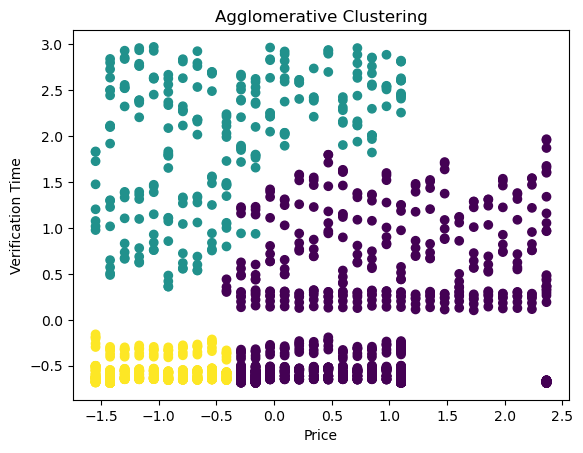

In [53]:
from numpy import unique
from numpy import where
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

# standarize data
scaler = StandardScaler()

auction[['b1_T', 'b2_T', 'b3_T', 'b4_T', 'price_T', 'product_T', 
         'winner_T', 'verification.time_T']] = scaler.fit_transform(auction[['process.b1.capacity',
            'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity', 'property.price', 'property.product', 
            'property.winner', 'numeric_ver_time']])

# Agglomerative Cluster
agglom = AgglomerativeClustering(n_clusters = 3)
agglom.fit(auction[['price_T', 'verification.time_T']])
auction['agglom_3'] = agglom.labels_

plt.scatter(x = auction['price_T'], y = auction['verification.time_T'], c = auction['agglom_3'])
plt.xlabel('Price')
plt.ylabel('Verification Time')
plt.title('Agglomerative Clustering')
plt.show()



b) K-means

C:\Users\garla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


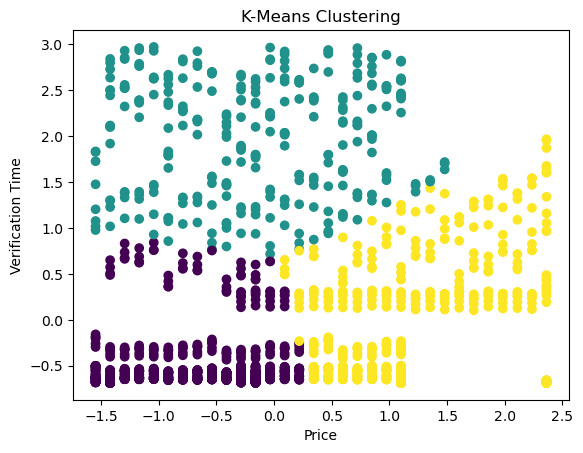

In [54]:
from sklearn.cluster import KMeans

# K means
kmeans = KMeans(n_clusters = 3)
kmeans.fit(auction[['price_T', 'verification.time_T']])
auction['kmeans_3'] = kmeans.labels_

plt.scatter(x = auction['price_T'], y = auction['verification.time_T'], c = auction['kmeans_3'])
plt.xlabel('Price')
plt.ylabel('Verification Time')
plt.title('K-Means Clustering')
plt.show()
         

c) Mini-batch k-means

C:\Users\garla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\garla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


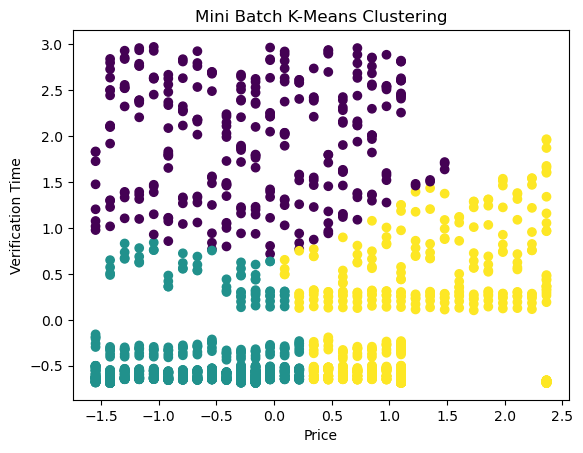

In [55]:
from sklearn.cluster import MiniBatchKMeans

mini_k = MiniBatchKMeans(n_clusters= 3, batch_size = 100, random_state = 42)
mini_k.fit(auction[['price_T', 'verification.time_T']])
auction['mini_k_3'] = mini_k.labels_

plt.scatter(x = auction['price_T'], y = auction['verification.time_T'], c = auction['mini_k_3'])
plt.xlabel('Price')
plt.ylabel('Verification Time')
plt.title('Mini Batch K-Means Clustering')
plt.show()

d) Mean-shift clustering

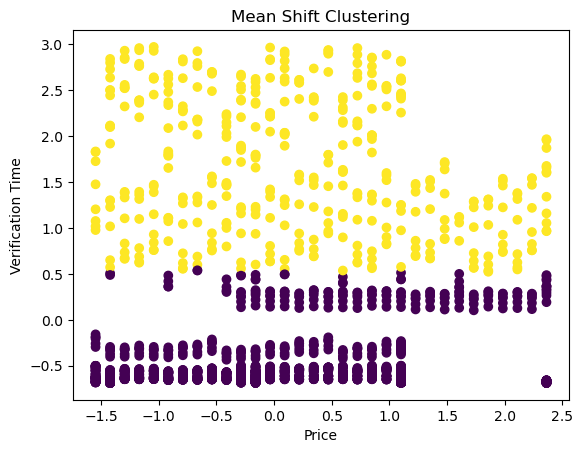

In [56]:
from sklearn.cluster import MeanShift

mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(auction[['price_T', 'verification.time_T']])
auction['mean_shift_clusters'] = mean_shift_labels

# Plot the clusters
plt.scatter(x=auction['price_T'], y=auction['verification.time_T'], c=auction['mean_shift_clusters'])
plt.xlabel('Price')
plt.ylabel('Verification Time')
plt.title('Mean Shift Clustering')
plt.show()



# Step 2 
We then classify the dataset using at least three classification methods, such as
- Logistic Regression.
- K-Nearest Neighbors.
- Decision Trees.
- Support Vector Machine.
- Naive Bayes.
- Neural Network

a) Logistic Regression

[[420   0]
 [ 48  13]]


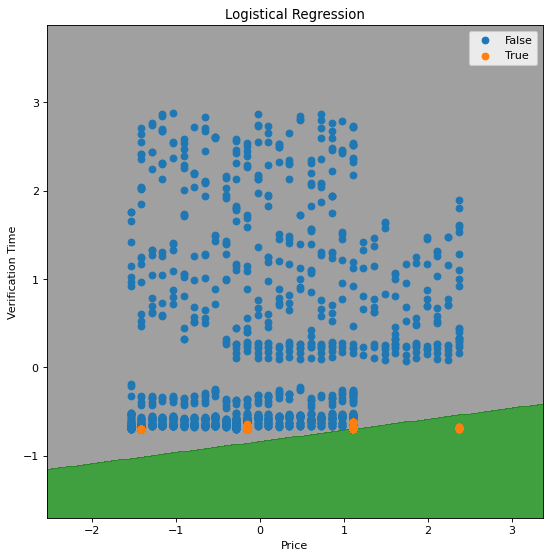

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

X = auction.iloc[:, [4, 9]].values
y = auction.iloc[:, 7].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0][0]+cm[1][1]/sum(sum(cm)))
print(cm)

# Graph Results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
plt.figure(figsize=(8, 8), dpi=80)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
colors =['gray', 'green']
cmap = ListedColormap(colors)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Logistical Regression')
plt.xlabel('Price')
plt.ylabel('Verification Time')
plt.legend()
plt.show()



b) K-Nearest Neighbors

In [58]:
# Import LabelEncoder
from sklearn import preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
X = auction.iloc[:, [4, 9]].values
y = auction.iloc[:, 7].values
print(np.shape(X))
auction.head()


(1921, 2)


,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time,numeric_ver_time,...,b3_T,b4_T,price_T,product_T,winner_T,verification.time_T,agglom_3,kmeans_3,mini_k_3,mean_shift_clusters
4,0,0,2,1,60,1,0,True,85.466667,85.466667,...,0.375148,0.858423,-1.422518,-1.273719,-0.418530,-0.686176,2,0,1,0
5,0,0,2,1,60,1,3,True,82.000000,82.000000,...,0.375148,0.858423,-1.422518,-1.273719,2.402511,-0.686570,2,0,1,0
7,0,0,2,1,60,2,0,True,80.950000,80.950000,...,0.375148,0.858423,-1.422518,-0.726211,-0.418530,-0.686689,2,0,1,0
8,0,0,2,1,60,2,3,True,78.000000,78.000000,...,0.375148,0.858423,-1.422518,-0.726211,2.402511,-0.687023,2,0,1,0
10,0,0,2,1,60,4,0,True,80.250000,80.250000,...,0.375148,0.858423,-1.422518,0.368806,-0.418530,-0.686768,2,0,1,0


In [59]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(np.shape(X_train))
print(X_train)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)


(1440, 2)
[[-0.90944117  0.32207972]
 [-0.40608947 -0.65913473]
 [-0.53192739 -0.56576912]
 ...
 [ 0.474776    0.0963833 ]
 [-0.15441362 -0.69306061]
 [-0.53192739 -0.5773486 ]]


In [60]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[416   4]
 [  6  55]]


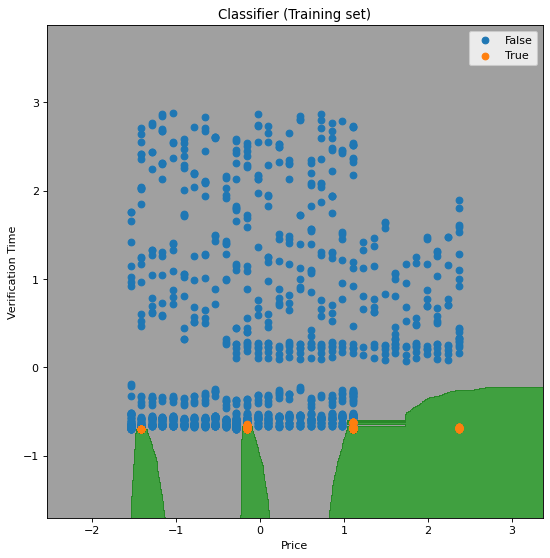

In [61]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
plt.figure(figsize=(8, 8), dpi=80)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
colors =['gray', 'green']
cmap = ListedColormap(colors)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Price')
plt.ylabel('Verification Time')
plt.legend()
plt.show()

c) Support Vector Machine

C:\Users\garla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\garla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\garla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


gamma = 0.01, C = 0.10
              precision    recall  f1-score   support

       False       0.87      1.00      0.93       420
        True       0.00      0.00      0.00        61

    accuracy                           0.87       481
   macro avg       0.44      0.50      0.47       481
weighted avg       0.76      0.87      0.81       481



C:\Users\garla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\garla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\garla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


gamma = 0.01, C = 1.00
              precision    recall  f1-score   support

       False       0.87      1.00      0.93       420
        True       0.00      0.00      0.00        61

    accuracy                           0.87       481
   macro avg       0.44      0.50      0.47       481
weighted avg       0.76      0.87      0.81       481

gamma = 0.01, C = 15.00
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       420
        True       0.93      0.62      0.75        61

    accuracy                           0.95       481
   macro avg       0.94      0.81      0.86       481
weighted avg       0.95      0.95      0.94       481

gamma = 0.01, C = 250.00
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       420
        True       0.90      0.62      0.74        61

    accuracy                           0.94       481
   macro avg       0.93      0.81      0.85       481
we

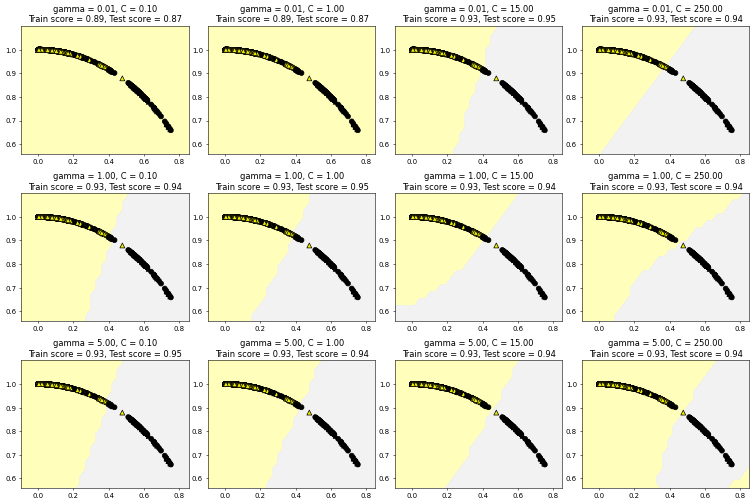

In [62]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)

X_norm = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):

    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma, C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        y_pred = clf.predict(X_test)
        result_metrics = classification_report(y_test, y_pred)
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        print(title)
        print(result_metrics)

#cant plot because it says it needs 8 GiB of memory